In this notebook, I want to talk about the process of taking a subset of data from a large dataset. So here I bring fundamental definitions which are:
* Sample: is a small portion of a large dataset. You can call the *sample* as *subset*.
* Population: The larger data set.
* Random sampling: Choosing samples randomly from a dataset. 
* Stratified sampling: Divide the population into strata and randomly sample from each strata. 
* Sample bias: A sample that misrepresents the population.
* Sample statistics: One defines a statistical approach let's say a metric for a sample.
* Standard error: It is abbriviated as *SE* which is standard deviation over the square root of the sample size (*n*). This can be formulated as: $SE$ = $s$/sqrt($n$) 
* Confidence interval: Is the range of values that we are almost certain that a true value sits in. 
* Error: The difference between a predicted value by a model and the true value. Error = X_real - X_predicted
* Standardize: To standardize the data, subtract each data points from the mean and devide the subtraction by the standard deviation.
* Standard normal: A normal distribution with an average = 0 and the standard deviation = 1.
* Z-score: It is a numerical value that shows a value's relationship to the mean of a group of values.
* T-distribution: It is almost similar to normal distribution but it is  shorter and wider. As the number of samples increases its heigth increases and its width becomes shorter. 

First things first, let's have the dataset available in hand:

In [2]:
from sklearn import datasets
import pandas as pd

california = datasets.fetch_california_housing()

print("The feature names of the dataset are:\n",california.feature_names)
print("\nThe target name of the dataset is:\n",california.target_names)

df_calif_data = pd.DataFrame(california.data)
df_calif_target = pd.DataFrame(california.target)

df_calif_data = df_calif_data.rename(columns={0:'MedInc', 1:'HouseAge', 2:'AveRooms', 3:'AveBedrms', 4:'Population',
                                 5:'AveOccup',6:'Latitude', 7:'Longitude'})

df_calif_target = df_calif_target.rename(columns={0:"MedHouseVal"})

The feature names of the dataset are:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

The target name of the dataset is:
 ['MedHouseVal']


In [10]:
df_data = pd.concat([df_calif_data, df_calif_target],axis=1)

In [13]:
print('\nHere is the dataframe of the dataset:\n')
df_data


Here is the dataframe of the dataset:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Sample, Population, Random Sampling

Below I create a sample with 20 elements from the *HouseAge* column. The *population* is the whole column of *HouseAge*. As I select the sample randomly thus this process is *Random Sampling*.

In [25]:
import random 
df_data['HouseAge'].sample(n=20, random_state=1)

4712     39.0
2151     37.0
15927    46.0
82       52.0
8161     37.0
6636     17.0
17333    12.0
19081    29.0
13298    35.0
7157     45.0
15734    31.0
12388    18.0
13589    50.0
3403     37.0
11888    34.0
7385     37.0
18378    17.0
6104     35.0
6881     31.0
16035    49.0
Name: HouseAge, dtype: float64

## Stratified Sampling

To work on the *Stratified Sampling* we can have three samples.

In [38]:
df_data.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7119,3.7308,35.0,5.690476,1.107143,744.0,2.952381,33.9,-118.03,2.024


## Standard Error
Let's calculate the *Standard Error* of the *MedInc* column.

In [47]:
import scipy
from scipy.stats import sem

print('The standard error of the MedInc column is:\n', sem(df_data['MedInc']) )

The standard error of the MedInc column is:
 0.013223852656038992


## Confidence Interval
Below I calculate the *confidence interval* for the *MedInc* column:

In [59]:
confidence = 0.95
data = df_data['MedInc'].values
length = len(data)
avg, SE = np.mean(data), sem(data)
h = SE*scipy.stats.t.ppf( (1+confidence)/2., length-1 )
print('The confidence intervals for the confidence of ', confidence, 'are\n' 
      , 'avg,                avg-h,                avg+h\n',
      avg, avg-h, avg+h)

The confidence intervals for the confidence of  0.95 are
 avg,                avg-h,                avg+h
 3.8706710029069766 3.844751207911283 3.8965907979026704


## Standardize

In [63]:
from sklearn import preprocessing

standard = preprocessing.scale(data)
standard

array([ 2.34476576,  2.33223796,  1.7826994 , ..., -1.14259331,
       -1.05458292, -0.78012947])

## Standard Normal
I choose the *MedInc* and *HouseAge* of the data. You can see the mean and the standard deviation of the data are not 0, and 1, respectively.

In [98]:
data2 = data[['MedInc', 'HouseAge']].values
print("The mean of the data is: ",np.mean(data2),"\nand the standard deviation of the data is: ", np.std(data2))

The mean of the data is:  16.255078718507754 
and the standard deviation of the data is:  15.309226675317731


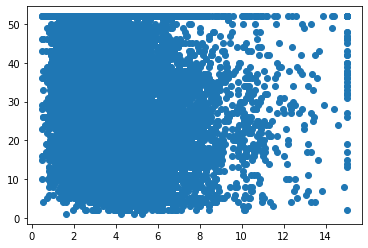

In [89]:
import matplotlib.pyplot as plt
plt.plot(data['MedInc'],data['HouseAge'],'o')

In [99]:
from sklearn.preprocessing import StandardScaler

data3 = df_data[['MedInc', 'HouseAge']]

scalar = StandardScaler()
scalar.fit(data3)

data4 = scalar.transform(data3)
print("The mean and standard deviation of the scaled data are:\n",np.mean(data4),np.std(data4))

The mean and standard deviation of the scaled data are:
 4.957274900651862e-17 0.9999999999999999


As you can see the mean ~ 0 and the std ~ 1. 

## Z-score
The Z-scores of the *MedInc* column of the data are:

In [61]:
scipy.stats.zscore(data)

array([ 2.34476576,  2.33223796,  1.7826994 , ..., -1.14259331,
       -1.05458292, -0.78012947])

## Calculating the T-Score
t score is subtraction of the sample mean and population mean devided by the standard error. Let's also choose 20 samples from the data and calculate its mean salary and the standard deviation. We can say the degrees of freedom is (sample_size -1) which is 19 here.

In [116]:
import statistics

sample_size = 20
sample = df_data['MedInc'].sample(n=sample_size, random_state=1)

average_pupulation_mean = df_data['MedInc'].mean()
sample_mean = sample.mean()
sample_std = statistics.stdev(sample)

t_score = (average_pupulation_mean - sample_mean)/(sample_std/np.sqrt(sample_size))

print("The t score value is:\n", t_score)

The t score value is:
 0.41823685753961504
